In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [ ]:
zip_path = '/content/drive/MyDrive/Colab Notebooks/EMODECTOR/Voice Recognition/Toronto_Speech_Dataset.zip'
unzip_dir = '/content/toronto_speech_data/'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Verify the extracted files
print(os.listdir(unzip_dir))

['tess toronto emotional speech set data', 'TESS Toronto emotional speech set data']


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/toronto_speech_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]


['/content/toronto_speech_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_wire_happy.wav',
 '/content/toronto_speech_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_king_happy.wav',
 '/content/toronto_speech_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_dodge_happy.wav',
 '/content/toronto_speech_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_jail_happy.wav',
 '/content/toronto_speech_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_soup_happy.wav']

In [ ]:
labels[:5]



['happy', 'happy', 'happy', 'happy', 'happy']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/toronto_speech_data/tess toronto emot...,happy
1,/content/toronto_speech_data/tess toronto emot...,happy
2,/content/toronto_speech_data/tess toronto emot...,happy
3,/content/toronto_speech_data/tess toronto emot...,happy
4,/content/toronto_speech_data/tess toronto emot...,happy


In [ ]:
df['label'].value_counts()


,count
label,
happy,400
angry,400
ps,400
disgust,400
neutral,400
sad,400
fear,400


<Axes: xlabel='label', ylabel='count'>

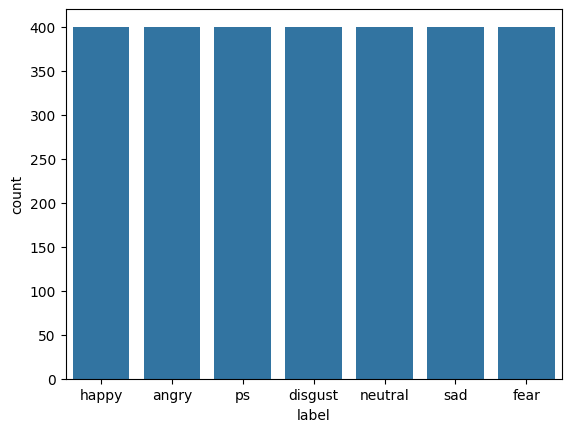

In [ ]:
sns.countplot(data=df, x='label')


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

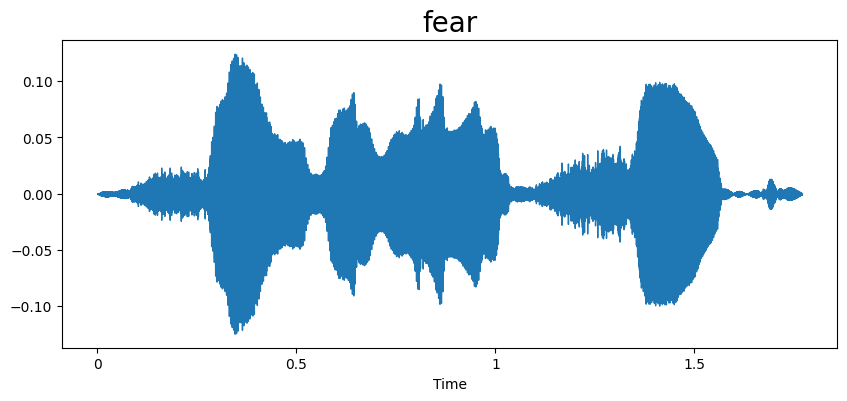

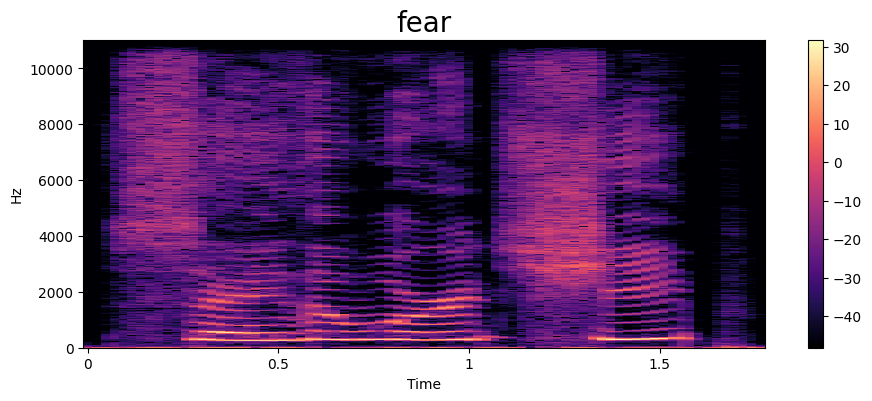

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

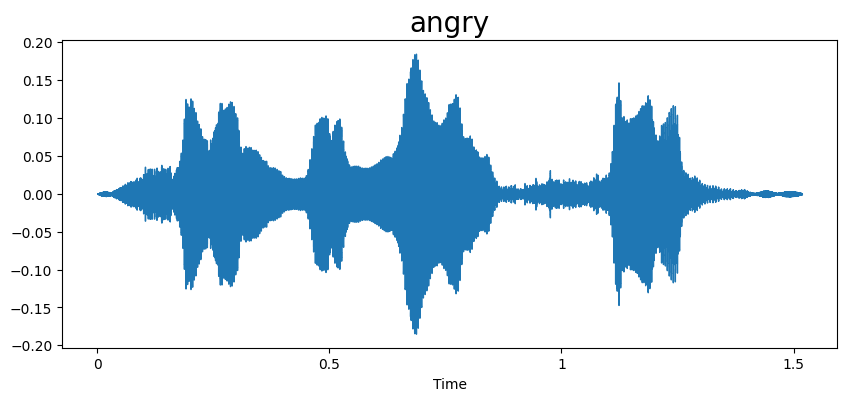

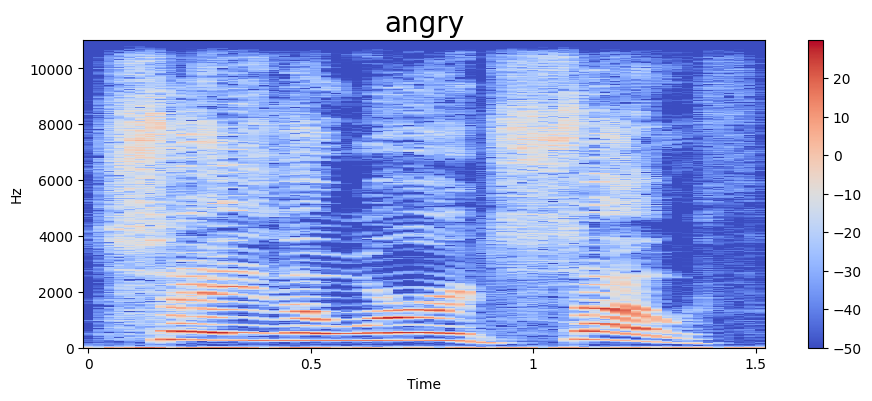

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

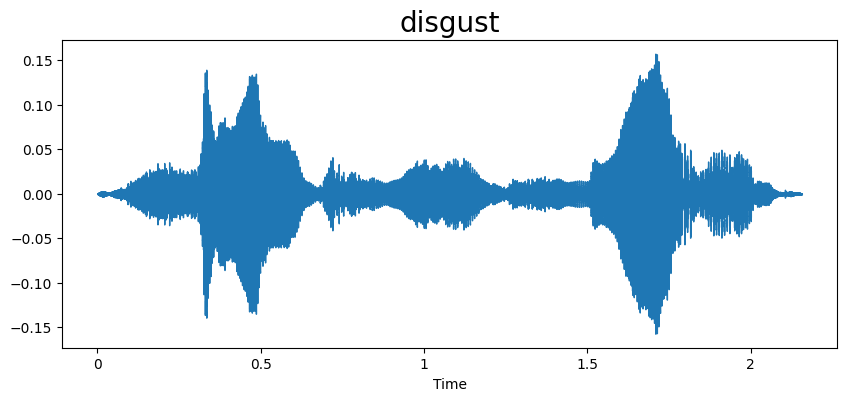

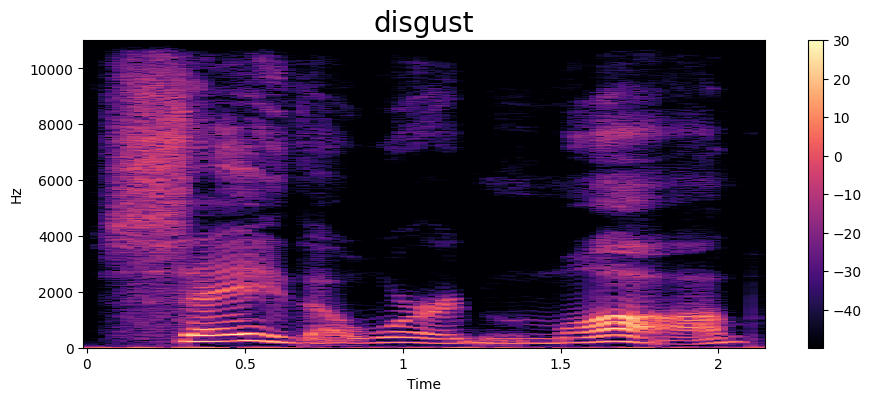

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

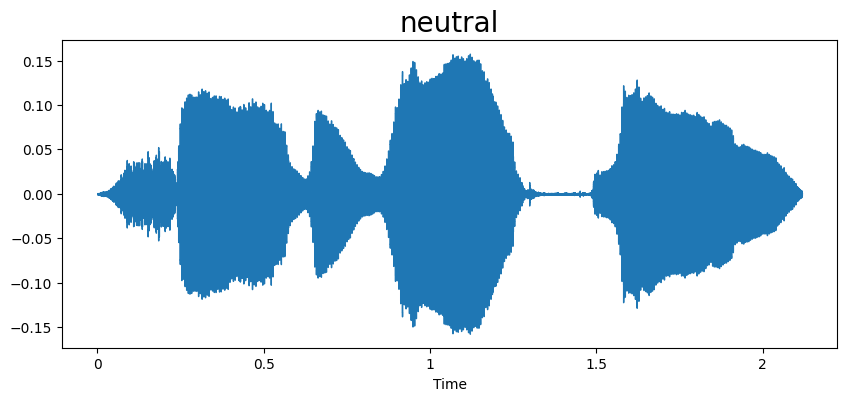

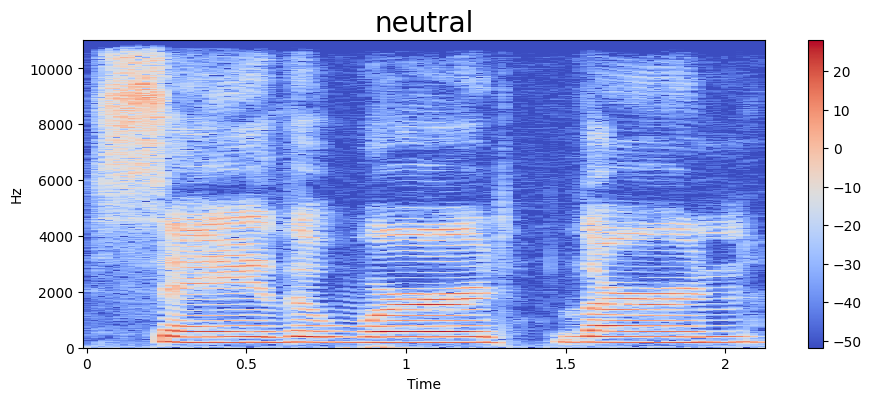

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

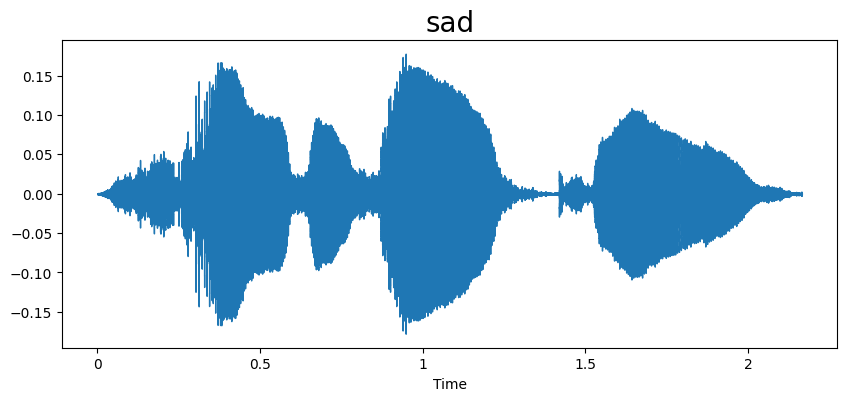

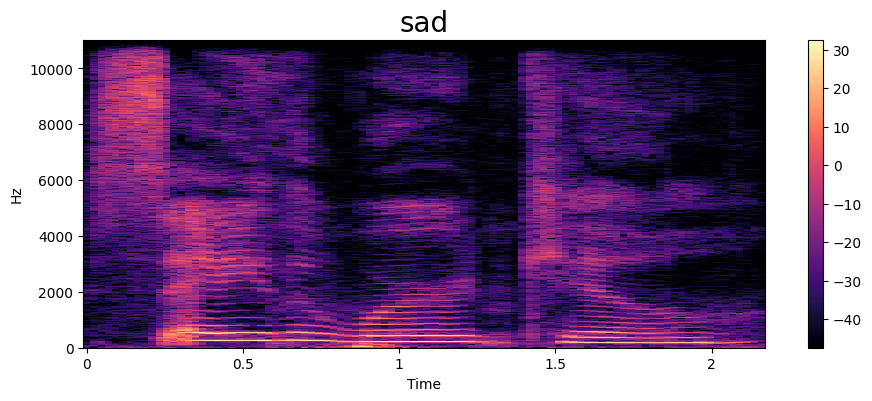

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

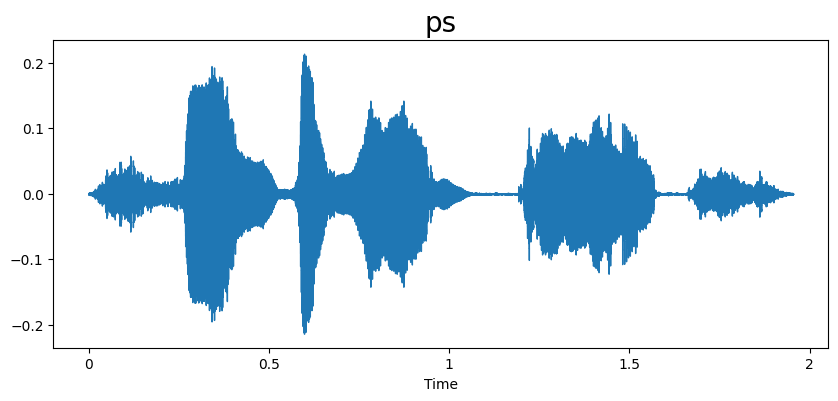

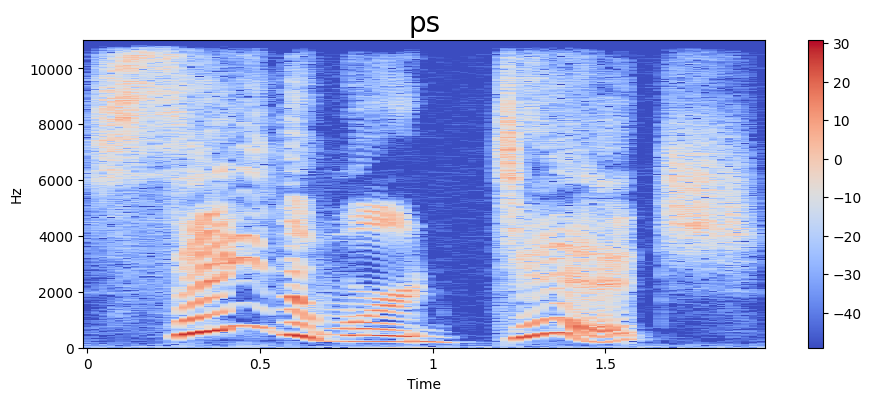

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

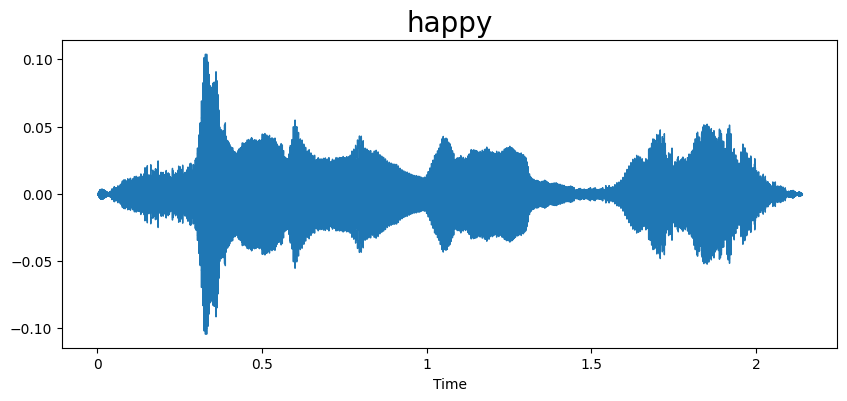

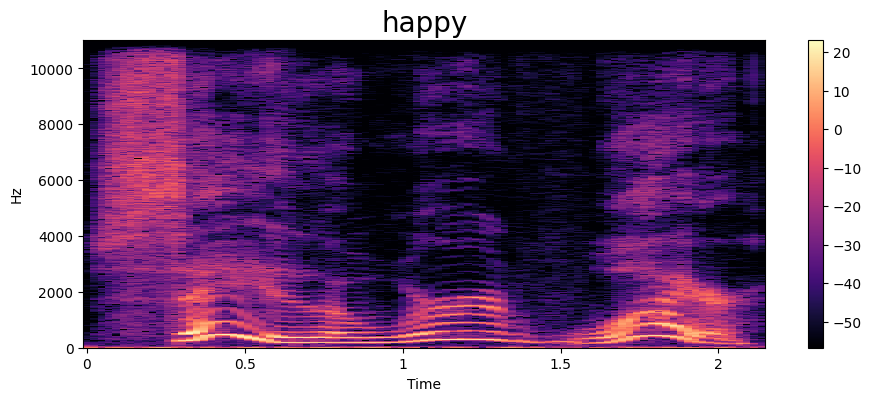

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])


array([-4.83021179e+02,  1.33152267e+02,  1.44370270e+01, -1.14514437e+01,
        2.43912387e+00,  1.98965669e+00, -1.32553043e+01, -1.18671846e+01,
       -1.36389990e+01, -4.39005661e+00, -1.28775845e+01, -7.15477037e+00,
       -6.92891026e+00, -2.75636959e+00, -2.09642744e+00,  6.84235275e-01,
       -1.09001505e+00,  6.50658512e+00,  1.61044466e+00, -6.36313725e+00,
        2.35070243e-01,  1.23113656e+00,  3.30840975e-01,  1.06179199e+01,
       -2.75096804e-01,  7.92355633e+00,  8.22293088e-02,  5.89745045e+00,
       -3.11818457e+00,  9.81580639e+00, -7.99484313e-01,  6.21155739e+00,
        9.85491574e-01,  2.77009058e+00,  4.53815174e+00,  9.99483871e+00,
        9.46591091e+00,  1.00070715e+01,  8.99196148e+00,  1.10007620e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [ ]:
X_mfcc


,speech
0,"[-483.02118, 133.15227, 14.437027, -11.451444,..."
1,"[-470.51227, 100.68906, 18.407953, 1.7734963, ..."
2,"[-469.63803, 95.18378, 24.493673, -4.7567487, ..."
3,"[-449.13742, 96.45725, 17.998125, -8.307005, -..."
4,"[-453.23495, 64.18998, 29.274574, -9.428626, 0..."
...,...
2795,"[-544.3698, 116.96632, 37.137573, 11.71324, 15..."
2796,"[-553.8178, 92.43754, 34.934864, 16.751532, 27..."
2797,"[-551.1689, 99.249886, 24.735567, 16.93599, 29..."
2798,"[-514.5388, 102.02084, 30.718626, 19.906744, 2..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()


In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 40)).reshape(-1, 40, 1)


In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Adjusting Conv1D for MFCC data
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(40, 1)),  # 1D convolution
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes
])

# Compile with Adam optimizer and a small learning rate
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 38, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,903 (284.78 KB)

 Trainable params: 72,903 (284.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



In [ ]:
# Train the model
history = model.fit(X_scaled, y, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1825 - loss: 1.9720 - val_accuracy: 0.0339 - val_loss: 2.0339
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2670 - loss: 1.8308 - val_accuracy: 0.0821 - val_loss: 2.0101
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3282 - loss: 1.7063 - val_accuracy: 0.1107 - val_loss: 1.9815
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4172 - loss: 1.5803 - val_accuracy: 0.1214 - val_loss: 1.9365
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4783 - loss: 1.4400 - val_accuracy: 0.1429 - val_loss: 1.8775
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5286 - loss: 1.3362 - val_accuracy: 0.1714 - val_loss: 1.8182
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5858 - loss: 1.1837 - val_accuracy: 0.2125 - val_loss: 1.7506
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6390 - loss: 1.0873 - val_accuracy: 0.292

In [ ]:
train_accuracy = history.history['accuracy']


# Print the final accuracy after training
print(f" Accuracy: {train_accuracy[-1]:.4f}")


 Accuracy: 0.9366


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/EMODECTOR/Voice Recognition/toronto_speech_model_2.h5')


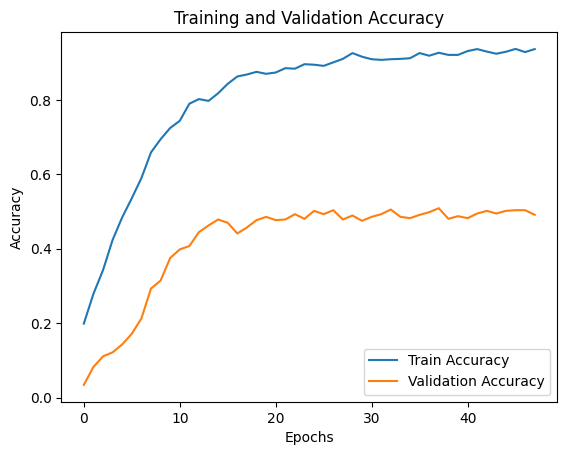

In [ ]:
# Adjust epochs based on the length of training history
epochs = range(len(history.history['accuracy']))

# Plot Train and Validation Accuracy
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

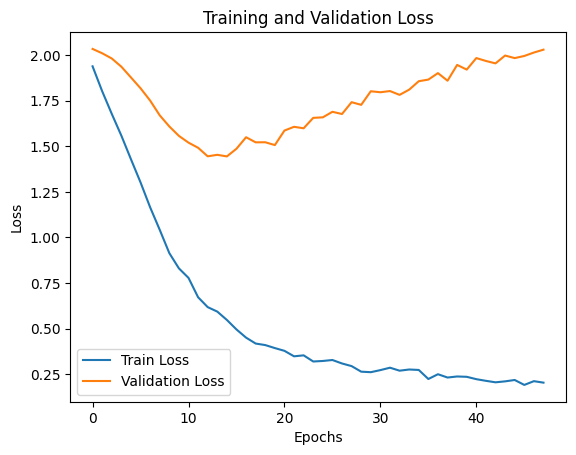

In [ ]:
# Plot Train and Validation Loss
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
